___

<center><h1>Premier League Exploratory Analysis</h1></center>

___

<center><h2>DSM020 - Data Programming in Python</h2></center><br>
<center><strong>Teacher:</strong> Sean McGrath</center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presented by:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>
<center style="color: #AA6373; font-weight: 400;">Student Number: 240323983</center>
<center style="color: #AA6373; font-weight: 400;">Student Portal Username: JEFL1</center>
<center>July 2024</center>
<p></p>
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction
The current project is developed to make an exploratory data analysis on the last 5 seasons of the Premier League, with this we aim to have a broad analysis for the season 2024-2025. here we aim to answer the following questions:
1. Which  teams have shown consistent improvement or decline over the past 5 seasons?
2. how do match  outcomes vary with the 

# Business Understanding
The first phase is the most important in the lifecycle of the project, the analysts can set expectations and success from the thorough understanding of the business requirements.
I've decided to make this Exploratory Data Analysis with information 

# 1. Data Processing

In [2]:
#Loading the datasets
Season2020 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2019-2020.csv'
Season2021 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2020-2021.csv'
Season2022 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2021-2022.csv'
Season2023 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2022-2023.csv'
Season2024 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2023-2024.csv'

df2020 = pd.read_csv(Season2020)
df2021 = pd.read_csv(Season2021)
df2022 = pd.read_csv(Season2022)
df2023 = pd.read_csv(Season2023)
df2024 = pd.read_csv(Season2024)

merged_df = pd.concat([df2020, df2021, df2022, df2023, df2024], ignore_index=True)

Many of the information we have in the datasets is destined to make statisticals analysis for bettings in each of the games, we have infomation from key to total goals betting odds to key to asian handicap betting odds, for this analysis we won't be needing this information that's why we will remove all the columns that are not going to be used in this analysis.

In [3]:
#Finding the index of the column 'AvgA'
avg_a_index = merged_df.columns.get_loc('AvgA')

#Select all columns up to and including 'AvgA'
columns_to_keep = merged_df.columns[:avg_a_index + 1]

#Create a new DataFrame with only the selected columns
filtered_df = merged_df[columns_to_keep]

print(filtered_df.head())
print(filtered_df.columns)

  Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG  ...    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0     4     0  ...  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1     0     1  ...   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2     0     0  ...   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3     0     0  ...   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4     0     0  ...   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  
0  8.75  19.83  
1  6.28   1.25  
2  3.53   3.83  
3  3.2

In [4]:
#Missing Values
missing_values = filtered_df.isnull().sum()

print("Missing values per column")
print(missing_values)
print(filtered_df.info)

Missing values per column
Div           0
Date          0
Time          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Referee       0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
B365H         0
B365D         0
B365A         0
BWH           2
BWD           2
BWA           2
IWH         182
IWD         182
IWA         182
PSH           0
PSD           0
PSA           0
WHH           0
WHD           0
WHA           0
VCH           0
VCD           0
VCA           0
MaxH          0
MaxD          0
MaxA          0
AvgH          0
AvgD          0
AvgA          0
dtype: int64
<bound method DataFrame.info of      Div        Date   Time          HomeTeam          AwayTeam  FTHG  FTAG  \
0     E0  09/08/2019  20:00         Liverpool           Norwich     4     1   
1  

By watching the accumulative missing values we can determine that the current dataset doens't have appropiate information on the betting portal VC Bet, here we can delete those columns and not add it to the overall analysis without affecting the total ammount of games.

In [5]:
#Drop Specific Columns 'IWH', 'IWD', 'IWA'
columns_to_drop = ['IWH', 'IWD', 'IWA']
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' ensures no error if columns not present

print(filtered_df.head())
print(filtered_df.columns)

  Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG  ...    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0     4     0  ...  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1     0     1  ...   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2     0     0  ...   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3     0     0  ...   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4     0     0  ...   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  
0  8.75  19.83  
1  6.28   1.25  
2  3.53   3.83  
3  3.2

In [ ]:
#Re-Run of Missing Values
missing_values = filtered_df.isnull().sum()

print("Missing values per column")
print(missing_values)
print(filtered_df.info)

In [6]:
#Delete Missing values rows
filtered_df.dropna(inplace=True)

# Replace infinite values with NaNs in the dataframe
filtered_df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

In [7]:
#Types of variables identification
numerical_var = filtered_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_var = filtered_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical variables:", numerical_var)
print("Categorical variables:", categorical_var)

Numerical variables: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
Categorical variables: ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']


In [8]:
# Convert 'Date' column to datetime format with the correct format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'], format='%d/%m/%Y', errors='coerce')

# Check if there are any issues in conversion
print(filtered_df['Date'].head(10))

0   2019-08-09
1   2019-08-10
2   2019-08-10
3   2019-08-10
4   2019-08-10
5   2019-08-10
6   2019-08-10
7   2019-08-11
8   2019-08-11
9   2019-08-11
Name: Date, dtype: datetime64[ns]


In [9]:
# Convert 'Time' column to timedelta format
filtered_df['Time'] = pd.to_timedelta(filtered_df['Time'] + ':00')

# Check if there are any issues in conversion
print(filtered_df['Time'].head())

0   0 days 20:00:00
1   0 days 12:30:00
2   0 days 15:00:00
3   0 days 15:00:00
4   0 days 15:00:00
Name: Time, dtype: timedelta64[ns]


In [10]:
print(filtered_df.head())

  Div       Date            Time        HomeTeam          AwayTeam  FTHG  \
0  E0 2019-08-09 0 days 20:00:00       Liverpool           Norwich     4   
1  E0 2019-08-10 0 days 12:30:00        West Ham          Man City     0   
2  E0 2019-08-10 0 days 15:00:00     Bournemouth  Sheffield United     1   
3  E0 2019-08-10 0 days 15:00:00         Burnley       Southampton     3   
4  E0 2019-08-10 0 days 15:00:00  Crystal Palace           Everton     0   

   FTAG FTR  HTHG  HTAG  ...    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA  \
0     1   H     4     0  ...  21.00   1.14  9.5  23.00   1.16  10.00  23.00   
1     5   A     0     1  ...   1.24  12.00  6.5   1.25  13.00   6.75   1.29   
2     1   D     0     0  ...   3.80   2.00  3.6   4.00   2.06   3.65   4.00   
3     0   H     0     0  ...   2.75   2.70  3.3   2.80   2.80   3.33   2.85   
4     0   D     0     0  ...   2.35   3.20  3.3   2.45   3.21   3.40   2.52   

    AvgH  AvgD   AvgA  
0   1.14  8.75  19.83  
1  11.84  6.28   1.2

# BASIC DESCRIPTIVE STATISTICS

In [11]:
#Re-run the Numerical and categorical variables to update the data formats
numerical_var = filtered_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_var = filtered_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical variables:", numerical_var)
print("Categorical variables:", categorical_var)

Numerical variables: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
Categorical variables: ['Div', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']


Here we calculate the cardinality of the categorical variables to understand the relationships between information, with this we aim to have tools to better make further analysis

In [12]:
#To calculate cardinality 
cardinality = {var: len(filtered_df[var].value_counts()) for var in categorical_var}

#From dictionaries to DF
df_cardinality = pd.DataFrame(list(cardinality.items()), columns=['Variable', 'Cardinality'])
#Sorting
df_cardinality = df_cardinality.sort_values(by='Cardinality', ascending=False)

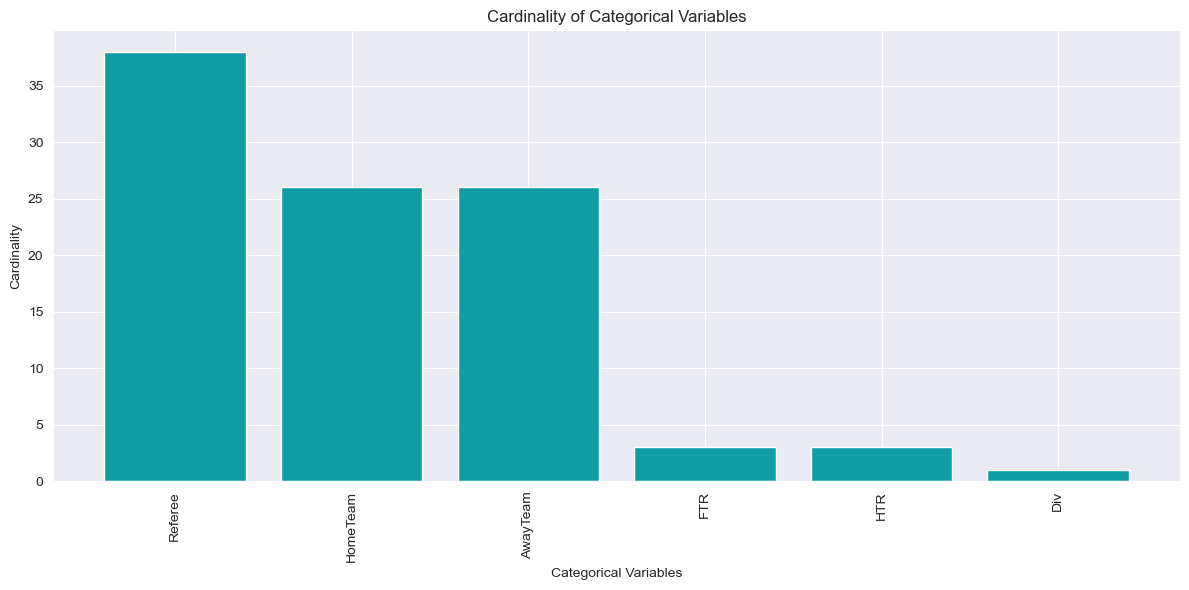

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(df_cardinality['Variable'], df_cardinality['Cardinality'], color='#119DA4')
plt.xlabel('Categorical Variables')
plt.ylabel('Cardinality')
plt.title('Cardinality of Categorical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here we can appreciate that the categorical variables with the highest cardinality would be the 'Referee' one, this will limitate the analysis because

In [14]:
# Summary statistics for numerical columns
numerical_summary = filtered_df[numerical_var].describe(include='all')
print("Summary Statistics for Numerical Variables:\n", numerical_summary)

# Calculate mode for numerical columns
numerical_mode = filtered_df[numerical_var].mode().iloc[0]
print("\nMode for Numerical Variables:\n", numerical_mode)

Summary Statistics for Numerical Variables:
               FTHG         FTAG         HTHG         HTAG           HS  \
count  1898.000000  1898.000000  1898.000000  1898.000000  1898.000000   
mean      1.563751     1.310327     0.708114     0.586934    13.862487   
std       1.344817     1.239445     0.859777     0.789412     5.746861   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     1.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     9.000000     5.000000     5.000000    36.000000   

                AS          HST          AST           HF           AF  ...  \
count  1898.000000  1898.000000  1898.000000  1898.000000  1898.000000  ...   
mean     11.603793     4.821918     4.111170    10.621707    10.798209  ...   
std       5.188693     2.638650     2.428258     3.

In this initial statistical analysis we can find ...

In [15]:
# Summary statistics for categorical columns
categorical_summary = filtered_df[categorical_var].describe(include='all')
print("\nSummary Statistics for Categorical Variables:\n", categorical_summary)

# Mode for categorical columns
categorical_mode = filtered_df[categorical_var].mode().iloc[0]
print("\nMode for Categorical Variables:\n", categorical_mode)


Summary Statistics for Categorical Variables:
          Div   HomeTeam AwayTeam   FTR   HTR   Referee
count   1898       1898     1898  1898  1898      1898
unique     1         26       26     3     3        38
top       E0  Liverpool  Chelsea     H     D  A Taylor
freq    1898         95       95   838   743       145

Mode for Categorical Variables:
 Div               E0
HomeTeam     Arsenal
AwayTeam     Arsenal
FTR                H
HTR                D
Referee     A Taylor
Name: 0, dtype: object


For the categorical variables we can understand this ...

# Distribution outcomes

In [16]:
# Count the occurrences of each result in Full Time Result (FTR)
ftr_counts = filtered_df['FTR'].value_counts()
print("\nDistribution of Match Results (Full Time):\n", ftr_counts)

# If you also have Half Time Result (HTR) and want to analyze it
htr_counts = filtered_df['HTR'].value_counts()
print("\nDistribution of Match Results (Half Time):\n", htr_counts)


Distribution of Match Results (Full Time):
 FTR
H    838
A    630
D    430
Name: count, dtype: int64

Distribution of Match Results (Half Time):
 HTR
D    743
H    651
A    504
Name: count, dtype: int64


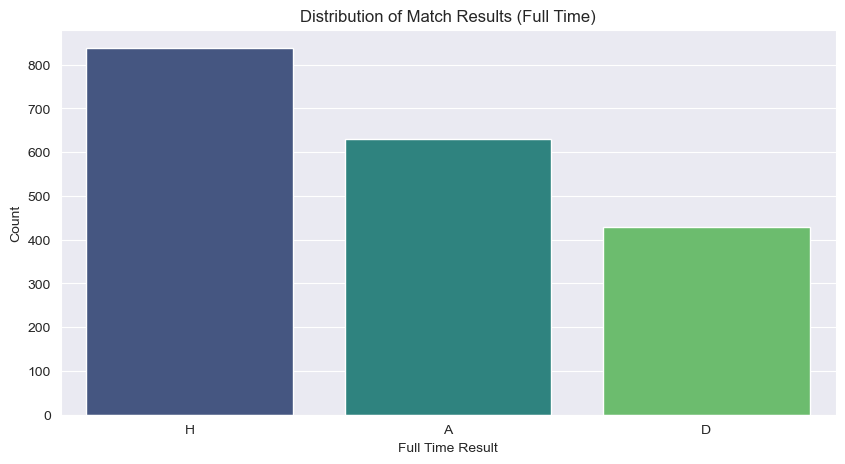

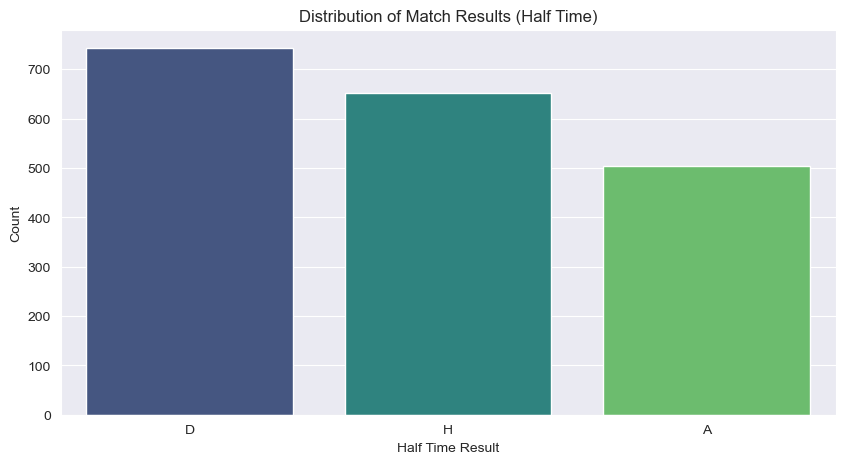

In [17]:
# Create bar plots for Full Time Result distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=ftr_counts.index, y=ftr_counts.values, palette='viridis')
plt.title('Distribution of Match Results (Full Time)')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

# Create bar plots for Half Time Result distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=htr_counts.index, y=htr_counts.values, palette='viridis')
plt.title('Distribution of Match Results (Half Time)')
plt.xlabel('Half Time Result')
plt.ylabel('Count')
plt.show()


Home Goals Statistics:
 count    1898.000000
mean        1.563751
std         1.344817
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTHG, dtype: float64

Away Goals Statistics:
 count    1898.000000
mean        1.310327
std         1.239445
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTAG, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


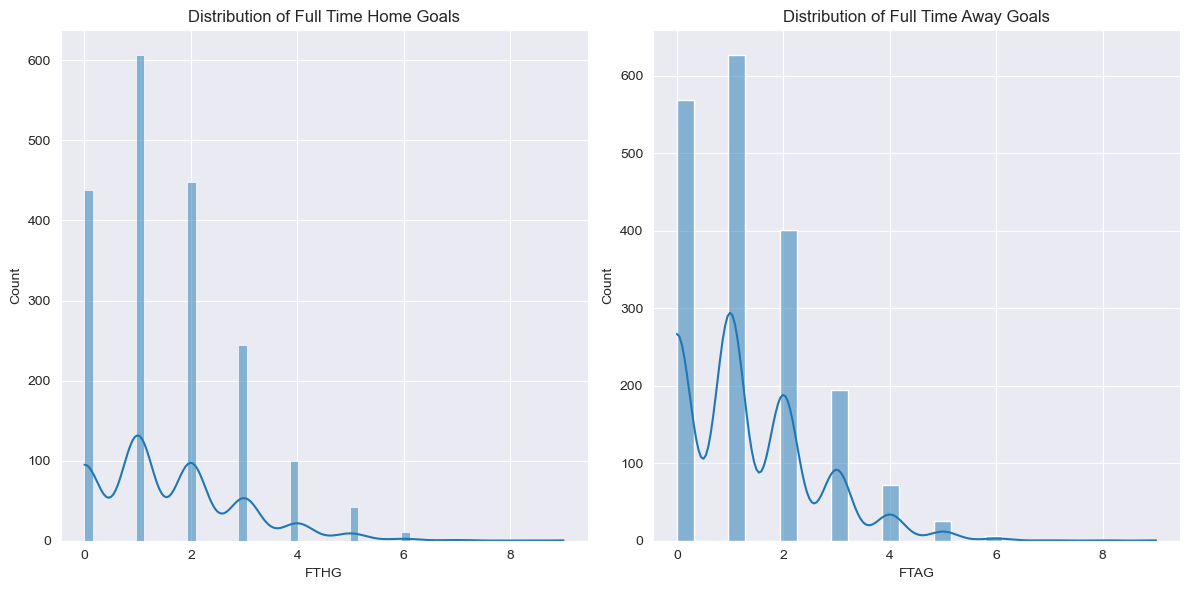


Home Half Time Goals Statistics:
 count    1898.000000
mean        0.708114
std         0.859777
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: HTHG, dtype: float64

Away Half Time Goals Statistics:
 count    1898.000000
mean        0.586934
std         0.789412
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: HTAG, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


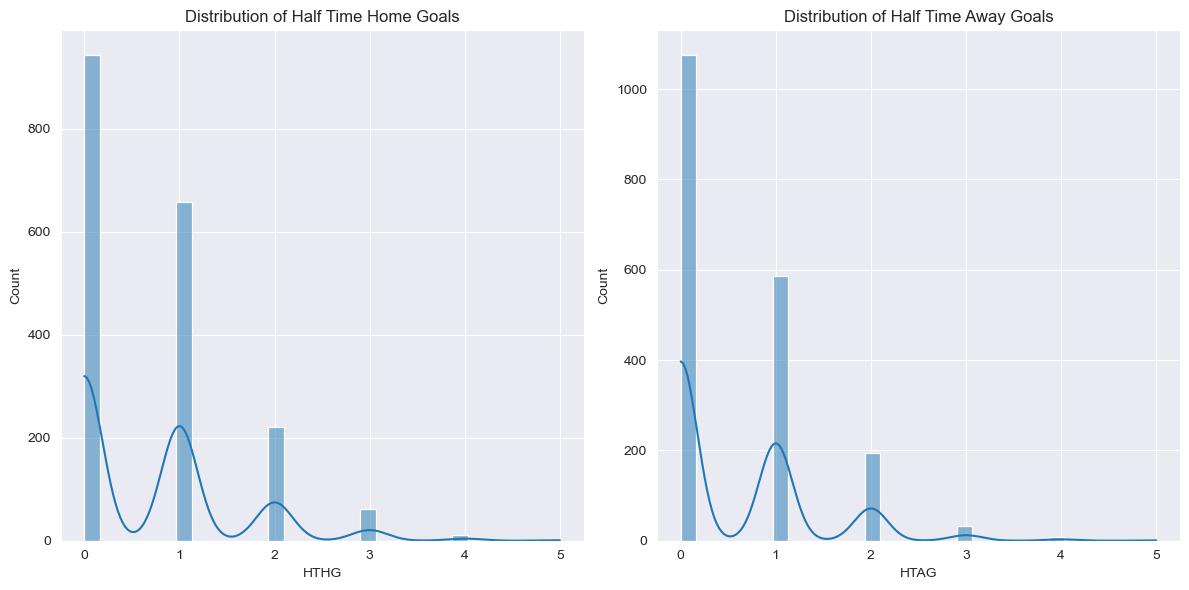

In [18]:
# Summary statistics for goals scored by home and away teams
home_goals_stats = filtered_df['FTHG'].describe()
away_goals_stats = filtered_df['FTAG'].describe()
print("\nHome Goals Statistics:\n", home_goals_stats)
print("\nAway Goals Statistics:\n", away_goals_stats)

# Plot the distribution of goals scored by home and away teams
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_df['FTHG'], kde=True)
plt.title('Distribution of Full Time Home Goals')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['FTAG'], kde=True)
plt.title('Distribution of Full Time Away Goals')

plt.tight_layout()
plt.show()

# If you want to include Half Time Goals as well
home_ht_goals_stats = filtered_df['HTHG'].describe()
away_ht_goals_stats = filtered_df['HTAG'].describe()
print("\nHome Half Time Goals Statistics:\n", home_ht_goals_stats)
print("\nAway Half Time Goals Statistics:\n", away_ht_goals_stats)

# Plot the distribution of half time goals scored by home and away teams
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_df['HTHG'], kde=True)
plt.title('Distribution of Half Time Home Goals')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['HTAG'], kde=True)
plt.title('Distribution of Half Time Away Goals')

plt.tight_layout()
plt.show()


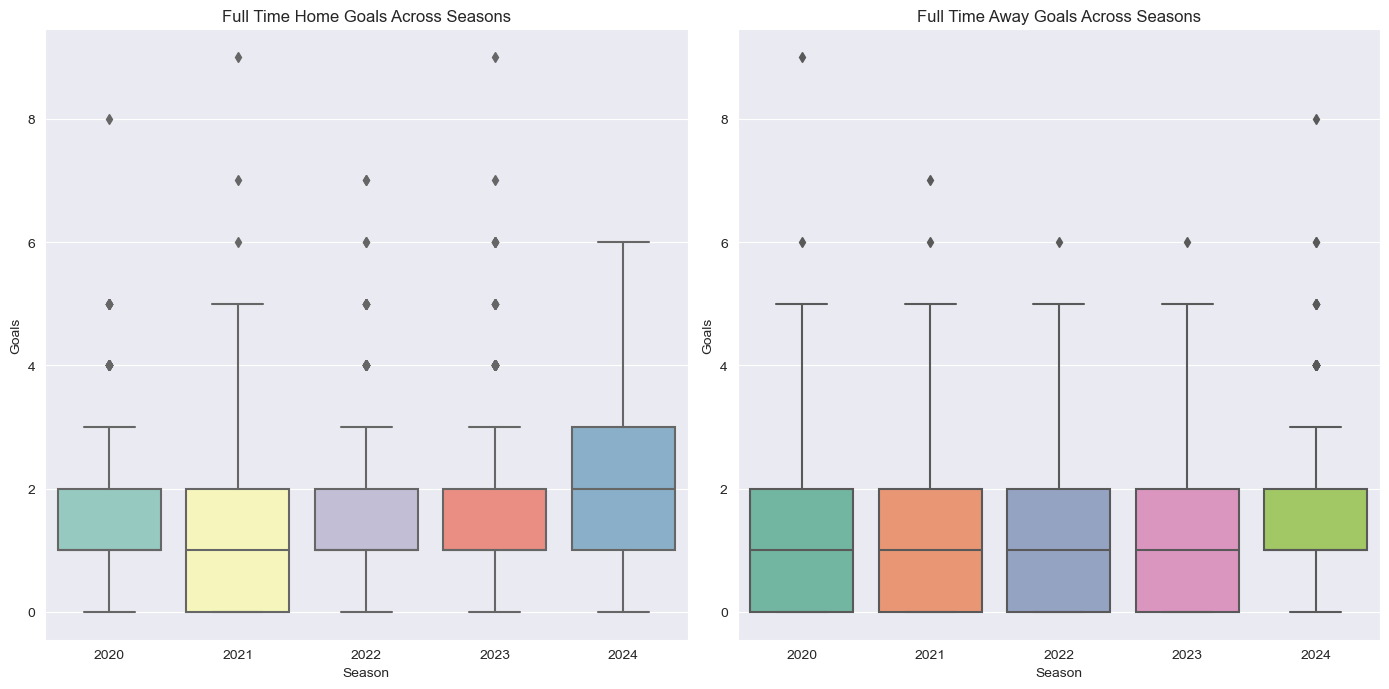

In [19]:
# Extract the season from the date
filtered_df['Season'] = filtered_df['Date'].dt.year + (filtered_df['Date'].dt.month >= 8).astype(int)

plt.figure(figsize=(14, 7))

# Boxplot for Home Goals
plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='FTHG', data=filtered_df, palette='Set3')
plt.title('Full Time Home Goals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Goals')

# Boxplot for Away Goals
plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='FTAG', data=filtered_df, palette='Set2')
plt.title('Full Time Away Goals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Goals')

plt.tight_layout()
plt.show()

Comparative Analysis

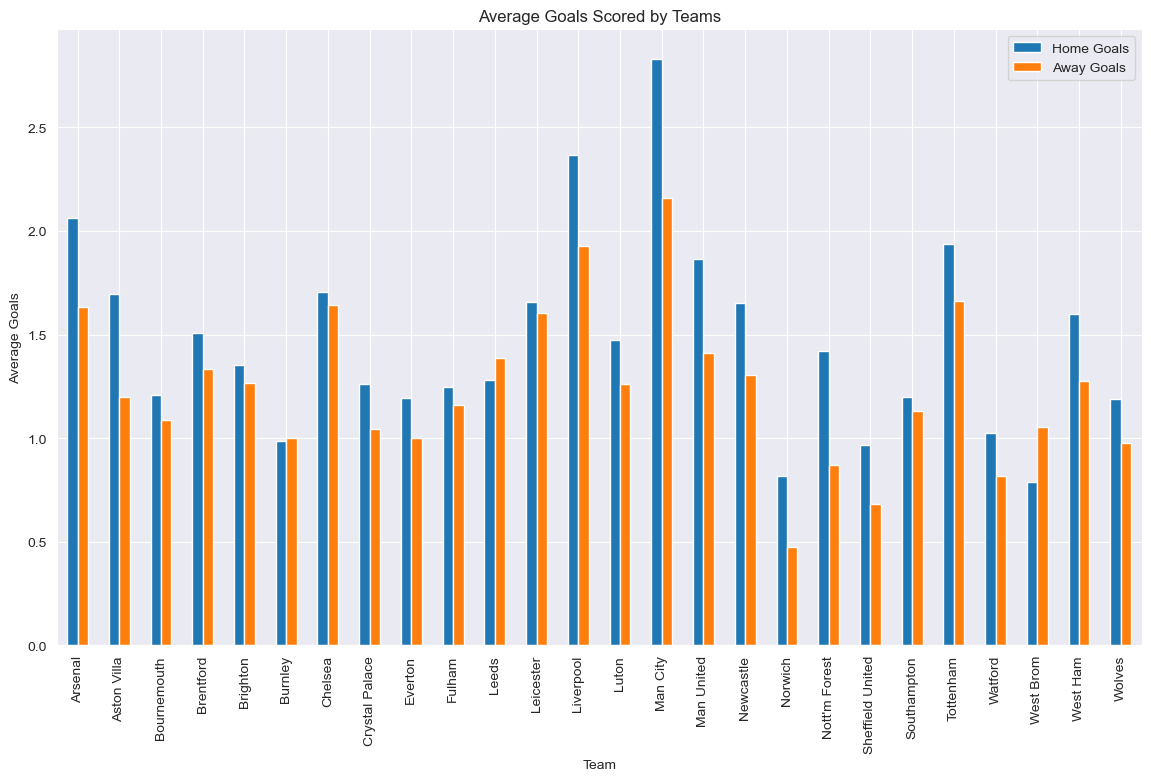

In [20]:
# Average goals scored by each home team
avg_home_goals = filtered_df.groupby('HomeTeam')['FTHG'].mean()

# Average goals scored by each away team
avg_away_goals = filtered_df.groupby('AwayTeam')['FTAG'].mean()

# Combine into a single DataFrame for comparison
avg_goals = pd.DataFrame({'Home Goals': avg_home_goals, 'Away Goals': avg_away_goals})

# Plot average goals
avg_goals.plot(kind='bar', figsize=(14, 8))
plt.title('Average Goals Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.legend(['Home Goals', 'Away Goals'])
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Team Performance Analysis

In [21]:
# Calculate win/loss ratio, goals scored/conceded, home vs. away performance
team_performance = filtered_df.groupby(['Season', 'HomeTeam']).agg(
    HomeWins=('FTR', lambda x: (x == 'H').sum()),
    HomeDraws=('FTR', lambda x: (x == 'D').sum()),
    HomeLosses=('FTR', lambda x: (x == 'A').sum()),
    HomeGoalsScored=('FTHG', 'sum'),
    HomeGoalsConceded=('FTAG', 'sum'),
    HomeMatches=('HomeTeam', 'count')
).reset_index()

away_performance = filtered_df.groupby(['Season', 'AwayTeam']).agg(
    AwayWins=('FTR', lambda x: (x == 'A').sum()),
    AwayDraws=('FTR', lambda x: (x == 'D').sum()),
    AwayLosses=('FTR', lambda x: (x == 'H').sum()),
    AwayGoalsScored=('FTAG', 'sum'),
    AwayGoalsConceded=('FTHG', 'sum'),
    AwayMatches=('AwayTeam', 'count')
).reset_index()


In [22]:
# Rename columns for merging
away_performance.rename(columns={'AwayTeam': 'Team'}, inplace=True)
team_performance.rename(columns={'HomeTeam': 'Team'}, inplace=True)

# Merge home and away performance
performance = pd.merge(team_performance, away_performance, on=['Season', 'Team'])

In [23]:
# Calculate overall performance
performance['TotalWins'] = performance['HomeWins'] + performance['AwayWins']
performance['TotalDraws'] = performance['HomeDraws'] + performance['AwayDraws']
performance['TotalLosses'] = performance['HomeLosses'] + performance['AwayLosses']
performance['TotalGoalsScored'] = performance['HomeGoalsScored'] + performance['AwayGoalsScored']
performance['TotalGoalsConceded'] = performance['HomeGoalsConceded'] + performance['AwayGoalsConceded']
performance['WinLossRatio'] = performance['TotalWins'] / (performance['TotalLosses'] + 1)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


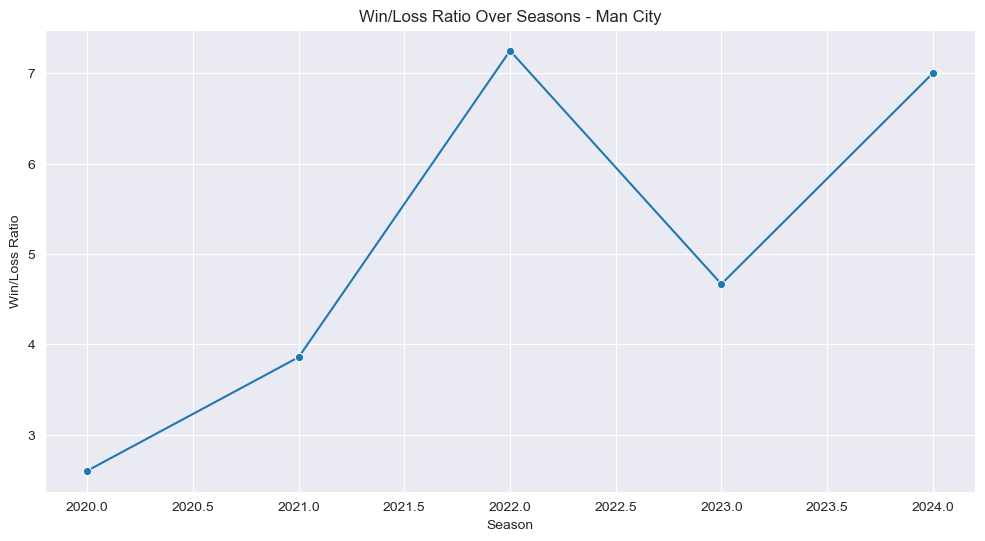

In [24]:
# Plot Win/Loss Ratio over Seasons for a Specific Team
team_name = 'Man City'  # Replace with any team name of interest

team_data = performance[performance['Team'] == team_name]

plt.figure(figsize=(12, 6))
sns.lineplot(data=team_data, x='Season', y='WinLossRatio', marker='o')
plt.title(f'Win/Loss Ratio Over Seasons - {team_name}')
plt.xlabel('Season')
plt.ylabel('Win/Loss Ratio')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

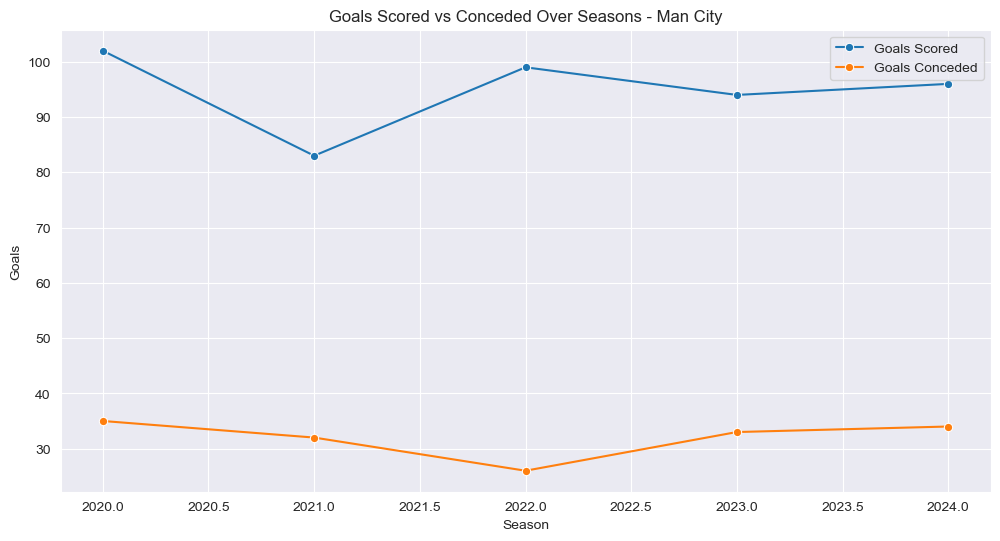

In [25]:
# Plot Goals Scored and Conceded over Seasons for a Specific Team
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_data, x='Season', y='TotalGoalsScored', marker='o', label='Goals Scored')
sns.lineplot(data=team_data, x='Season', y='TotalGoalsConceded', marker='o', label='Goals Conceded')
plt.title(f'Goals Scored vs Conceded Over Seasons - {team_name}')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

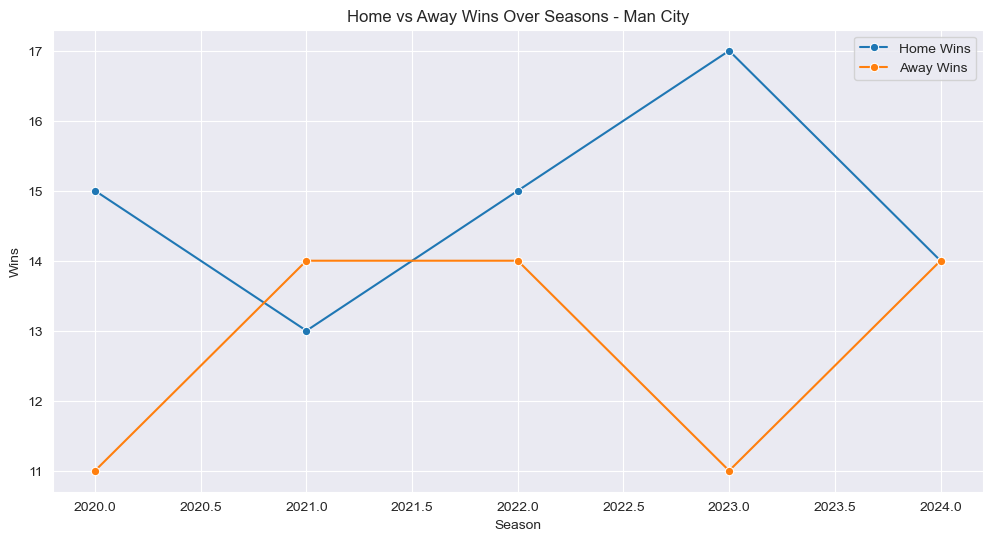

In [26]:
# Compare Home vs Away Performance for a Specific Team
team_data = performance[performance['Team'] == team_name]

plt.figure(figsize=(12, 6))
sns.lineplot(data=team_data, x='Season', y='HomeWins', marker='o', label='Home Wins')
sns.lineplot(data=team_data, x='Season', y='AwayWins', marker='o', label='Away Wins')
plt.title(f'Home vs Away Wins Over Seasons - {team_name}')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.legend()
plt.show()

In [27]:
# Overall Summary of Team Performance
summary = performance.groupby('Team').agg(
    TotalWins=('TotalWins', 'sum'),
    TotalDraws=('TotalDraws', 'sum'),
    TotalLosses=('TotalLosses', 'sum'),
    TotalGoalsScored=('TotalGoalsScored', 'sum'),
    TotalGoalsConceded=('TotalGoalsConceded', 'sum')
).reset_index()

summary['WinLossRatio'] = summary['TotalWins'] / (summary['TotalLosses'] + 1)


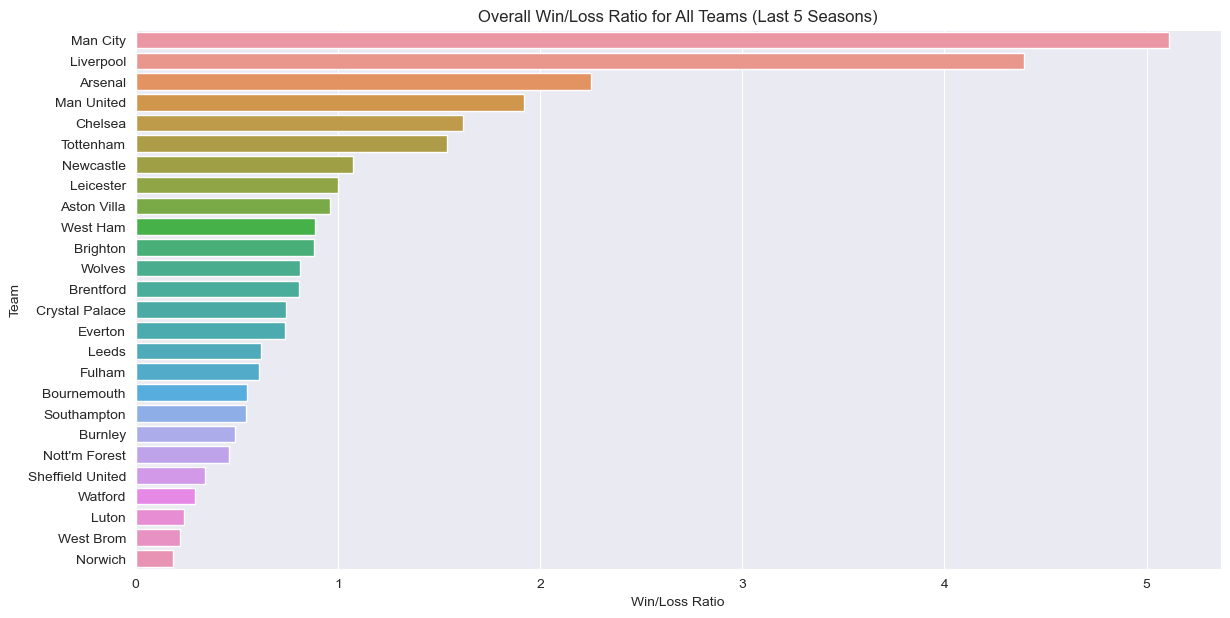

In [28]:
# Plot Overall Summary for All Teams
plt.figure(figsize=(14, 7))
sns.barplot(data=summary.sort_values(by='WinLossRatio', ascending=False), x='WinLossRatio', y='Team')
plt.title('Overall Win/Loss Ratio for All Teams (Last 5 Seasons)')
plt.xlabel('Win/Loss Ratio')
plt.ylabel('Team')
plt.show()

# Match Outcome Prediction

In [29]:
# Extract 'Season' from 'Date'
filtered_df['Season'] = filtered_df['Date'].apply(lambda x: x.year if x.month > 7 else x.year - 1)

# Filter data for the last five seasons
filtered_df = filtered_df[filtered_df['Season'] >= filtered_df['Season'].max() - 4]

In [30]:
# Group by Season and HomeTeam to calculate home performance metrics
home_performance = filtered_df.groupby(['Season', 'HomeTeam']).agg(
    HomeWins=('FTR', lambda x: (x == 'H').sum()),
    HomeDraws=('FTR', lambda x: (x == 'D').sum()),
    HomeLosses=('FTR', lambda x: (x == 'A').sum()),
    HomeGoalsScored=('FTHG', 'sum'),
    HomeGoalsConceded=('FTAG', 'sum'),
    HomeMatches=('HomeTeam', 'count')
).reset_index()

In [31]:
# Group by Season and AwayTeam to calculate away performance metrics
away_performance = filtered_df.groupby(['Season', 'AwayTeam']).agg(
    AwayWins=('FTR', lambda x: (x == 'A').sum()),
    AwayDraws=('FTR', lambda x: (x == 'D').sum()),
    AwayLosses=('FTR', lambda x: (x == 'H').sum()),
    AwayGoalsScored=('FTAG', 'sum'),
    AwayGoalsConceded=('FTHG', 'sum'),
    AwayMatches=('AwayTeam', 'count')
).reset_index()

In [32]:
# Rename columns for merging
away_performance.rename(columns={'AwayTeam': 'Team'}, inplace=True)
home_performance.rename(columns={'HomeTeam': 'Team'}, inplace=True)

# Merge home and away performance data on Season and Team
performance = pd.merge(home_performance, away_performance, on=['Season', 'Team'], suffixes=('_Home', '_Away'))


In [33]:
# Calculate overall performance metrics
performance['TotalWins'] = performance['HomeWins'] + performance['AwayWins']
performance['TotalDraws'] = performance['HomeDraws'] + performance['AwayDraws']
performance['TotalLosses'] = performance['HomeLosses'] + performance['AwayLosses']
performance['TotalGoalsScored'] = performance['HomeGoalsScored'] + performance['AwayGoalsScored']
performance['TotalGoalsConceded'] = performance['HomeGoalsConceded'] + performance['AwayGoalsConceded']
performance['WinLossRatio'] = performance['TotalWins'] / (performance['TotalLosses'] + 1)

# Calculate differences between home and away performance
performance['WinDifference'] = performance['HomeWins'] - performance['AwayWins']
performance['GoalScoredDifference'] = performance['HomeGoalsScored'] - performance['AwayGoalsScored']
performance['GoalConcededDifference'] = performance['HomeGoalsConceded'] - performance['AwayGoalsConceded']

# Display the performance DataFrame
print(performance.head())


   Season         Team  HomeWins  HomeDraws  HomeLosses  HomeGoalsScored  \
0    2019      Arsenal        10          6           3               36   
1    2019  Aston Villa         7          3           9               22   
2    2019  Bournemouth         5          6           8               22   
3    2019     Brighton         5          7           7               20   
4    2019      Burnley         8          4           7               24   

   HomeGoalsConceded  HomeMatches  AwayWins  AwayDraws  ...  AwayMatches  \
0                 24           19         4          8  ...           19   
1                 30           19         2          5  ...           19   
2                 30           19         4          1  ...           19   
3                 27           19         4          7  ...           19   
4                 23           19         7          5  ...           19   

   TotalWins  TotalDraws  TotalLosses  TotalGoalsScored  TotalGoalsConceded  \
0      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Bournemouth'),
  Text(3, 0, 'Brighton'),
  Text(4, 0, 'Burnley'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Crystal Palace'),
  Text(7, 0, 'Everton'),
  Text(8, 0, 'Leicester'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Man City'),
  Text(11, 0, 'Man United'),
  Text(12, 0, 'Newcastle'),
  Text(13, 0, 'Norwich'),
  Text(14, 0, 'Sheffield United'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham'),
  Text(17, 0, 'Watford'),
  Text(18, 0, 'West Ham'),
  Text(19, 0, 'Wolves'),
  Text(20, 0, 'Fulham'),
  Text(21, 0, 'Leeds'),
  Text(22, 0, 'West Brom'),
  Text(23, 0, 'Brentford'),
  Text(24, 0, "Nott'm Forest"),
  Text(25, 0, 'Luton')])

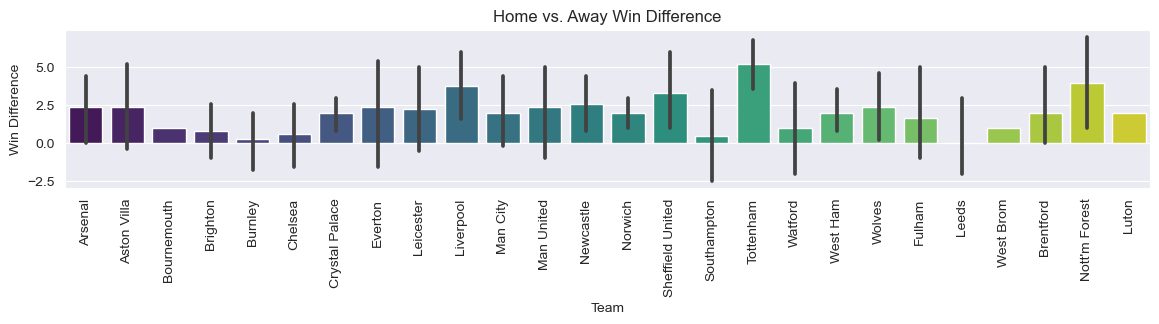

In [36]:
# Plot the differences
plt.figure(figsize=(14, 7))

# Win Difference
plt.subplot(3, 1, 1)
sns.barplot(x='Team', y='WinDifference', data=performance, palette='viridis')
plt.title('Home vs. Away Win Difference')
plt.ylabel('Win Difference')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Bournemouth'),
  Text(3, 0, 'Brighton'),
  Text(4, 0, 'Burnley'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Crystal Palace'),
  Text(7, 0, 'Everton'),
  Text(8, 0, 'Leicester'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Man City'),
  Text(11, 0, 'Man United'),
  Text(12, 0, 'Newcastle'),
  Text(13, 0, 'Norwich'),
  Text(14, 0, 'Sheffield United'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham'),
  Text(17, 0, 'Watford'),
  Text(18, 0, 'West Ham'),
  Text(19, 0, 'Wolves'),
  Text(20, 0, 'Fulham'),
  Text(21, 0, 'Leeds'),
  Text(22, 0, 'West Brom'),
  Text(23, 0, 'Brentford'),
  Text(24, 0, "Nott'm Forest"),
  Text(25, 0, 'Luton')])

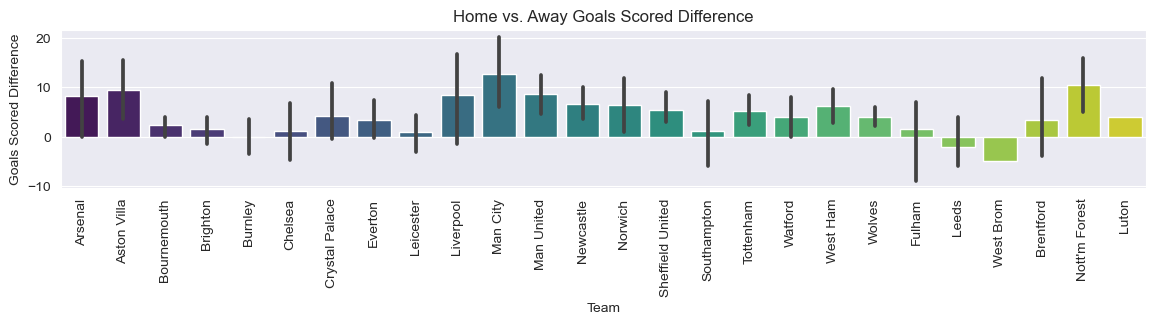

In [38]:
# Goals Scored Difference
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 2)
sns.barplot(x='Team', y='GoalScoredDifference', data=performance, palette='viridis')
plt.title('Home vs. Away Goals Scored Difference')
plt.ylabel('Goals Scored Difference')
plt.xticks(rotation=90)

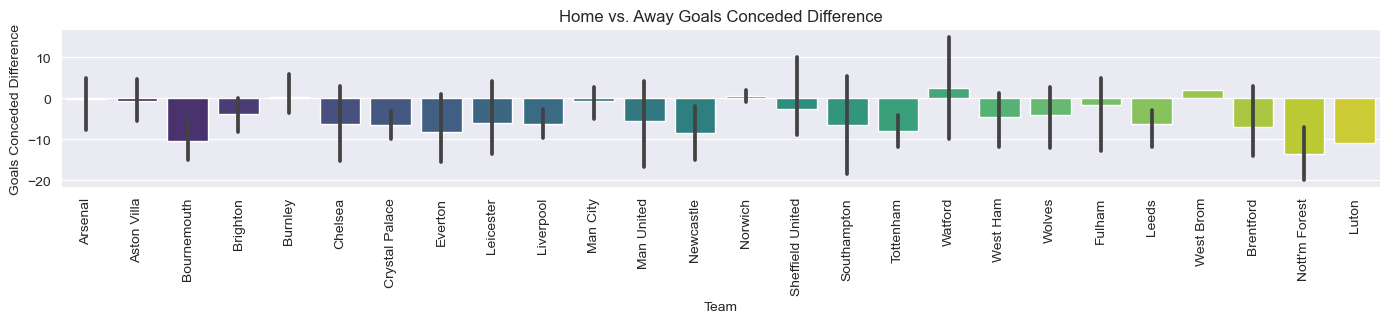

In [40]:
# Goals Conceded Difference
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 3)
sns.barplot(x='Team', y='GoalConcededDifference', data=performance, palette='viridis')
plt.title('Home vs. Away Goals Conceded Difference')
plt.ylabel('Goals Conceded Difference')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()